
# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
!pip install xmltodict

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
import xmltodict   #to excute data from xml column

<a id='wrangling'></a>
## Data Wrangling






In [4]:
#creating data frame from the tables
conn=sqlite3.connect('database.sqlite')
df_m=pd.read_sql('SELECT* FROM Match',con=conn)
df_c=pd.read_sql('SELECT* FROM Country',con=conn)
df_l=pd.read_sql('SELECT* FROM League',con=conn)
df_p=pd.read_sql('SELECT* FROM Player',con=conn)
df_t=pd.read_sql('SELECT* FROM Team',con=conn)


In [5]:
df_m.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [6]:
df_c.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [7]:
df_l.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [8]:
df_t.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [9]:
df_p.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [10]:
df_m.duplicated().sum()

0


### Data Cleaning


In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [12]:
#creating dicts of names and id
country_names_dict=dict(zip(df_c.id,df_c.name))
league_names_dict=dict(zip(df_l.country_id,df_l.name))
teams_names_dict=dict(zip(df_t.team_api_id,df_t.team_long_name))
players_names_dict=dict(zip(df_p.player_api_id,df_p.player_name))

In [13]:
#replacing id with names function throw input dict of names and column to be replaced
def names_and_id_replace(names_dict,col_to_be_replaced):
    for key,value in names_dict.items(): #iterate throw dict_names
        for i in col_to_be_replaced:
            if i==key:
                col_to_be_replaced.replace(to_replace=i,value=value,inplace=True)
    return'done successfully'            

In [14]:
#replacing country and league id in Match data frame with names
names_and_id_replace(country_names_dict,df_m['country_id'])
names_and_id_replace(league_names_dict,df_m['league_id'])

'done successfully'

In [15]:
#transform date column to date_time type and renaming replaced columns
df_m['date']=pd.to_datetime(df_m['date'])
df_m.rename(columns={'country_id':'country_name','league_id':'league_name'},inplace=True)


In [16]:
df_m['league_name'].unique()#check fo league names

array(['Belgium Jupiler League', 'England Premier League',
       'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
       'Netherlands Eredivisie', 'Poland Ekstraklasa',
       'Portugal Liga ZON Sagres', 'Scotland Premier League',
       'Spain LIGA BBVA', 'Switzerland Super League'], dtype=object)

##### Getting A Data Frame For Each League Then Transform It To Sql Table For Each League So That Can be Used In Our Functions

In [17]:
#create data frame for matches the top three leagues(La Liga,Premier League,Seria A)
Premier_League=df_m.query('league_name=="England Premier League"')
La_Liga=df_m.query('league_name=="Spain LIGA BBVA"')
Seria_A=df_m.query('league_name=="Italy Serie A"')
Ligue_1=df_m.query('league_name=="France Ligue 1"')
try:#save Selected league in sql type to use them in functions later
    Premier_League.to_sql('Premier_League',con=conn,index=False)
    La_Liga.to_sql('La_Liga',con=conn,index=False)
    Seria_A.to_sql('Seria_A',con=conn,index=False)
    Ligue_1.to_sql('Ligue_1',con=conn,index=False)
except:
    0   

#### Getting ADictionery For Team  Information (Win(Home,Away,Total),Lose(Home,Away,Total),Draws(Home,Away,Total)

In [18]:
def get_team_info(t_id,league) -> dict:#input team_id and league
    # creating dict to collect data
    team_info = {'team_id':t_id}
    team_id = str(t_id)
    
    # Collecting all matches for team with given team_id 
    home_matches = pd.read_sql(f'SELECT * FROM {league} WHERE home_team_api_id = {team_id}', conn)
    away_matches = pd.read_sql(f'SELECT * FROM {league} WHERE away_team_api_id = {team_id}', conn)
    matches = pd.concat([home_matches, away_matches])
    matches = matches.reset_index(drop=True)
    
    # getting win and lose and draws for each team :
    team_info['home_wins'] = int(pd.read_sql(f'''
    SELECT count(home_team_api_id) as cnt
    FROM {league}
    WHERE home_team_api_id = {team_id} and away_team_goal < home_team_goal
    ''', conn)['cnt'])
    
    team_info['home_draws'] = int(pd.read_sql(f'''
    SELECT count(home_team_api_id) as cnt
    FROM {league}
    WHERE home_team_api_id = {team_id} and away_team_goal = home_team_goal
    ''', conn)['cnt'])
    
    team_info['home_loses'] = home_matches.shape[0] - team_info['home_draws'] - team_info['home_wins']
    
    team_info['away_wins'] = int(pd.read_sql(f'''
    SELECT count(away_team_api_id) as cnt
    FROM {league}
    WHERE away_team_api_id = {team_id} and away_team_goal > home_team_goal
    ''', conn)['cnt'])
    
    team_info['away_draws'] = int(pd.read_sql(f'''
    SELECT count(away_team_api_id) as cnt
    FROM {league}
    WHERE away_team_api_id = {team_id} and away_team_goal = home_team_goal
    ''', conn)['cnt'])
    
    team_info['away_loses'] = away_matches.shape[0] - team_info['away_draws'] - team_info['away_wins']
    
    return team_info

#### Creating A DataFrame(Table) For League Contains Wins,Loses,Draws And Total Points Using The Above Function(get_team_info) And Iterate Throw Every Team In The League

In [19]:
#creating a dataframe with win,lose,draws,points and totals for each for league
# ordered in total points 
def get_data_frame_league(leaguee):  
    league__team_list=pd.read_sql(f'SELECT home_team_api_id FROM {leaguee}',con=conn)
    
    Total_league_stats=[] #getting total stats for each team un the league
    for team in league__team_list.home_team_api_id.unique():#getting teams in league
        Total_league_stats.append(get_team_info(team,f'{leaguee}'))
        Total_league_stats
    d_f=pd.DataFrame(Total_league_stats) #creating data frame from stats
    names_and_id_replace(teams_names_dict,d_f['team_id'])   
    d_f['total_wins']=d_f.home_wins+d_f.away_wins
    d_f['total_loses']=d_f.home_loses+d_f.away_loses
    d_f['total_draws']=d_f.home_draws+d_f.away_draws
    d_f['total_points']=d_f.total_wins*3+d_f.total_draws*1
#order the league by total points
    return d_f.sort_values(by='total_points',ascending=False).reset_index(drop=True)


#### To Make Analysis Throw Every Season In Every League
##### We Need To Get A Table For Every Season In Every League And Save It As Sql So It Can Be Used In(get_data_frame_league ) Fn 

In [20]:
#ITALY={'Seria_A_2015_2016':"2015/2016",'Seria_A_2014_2015':'2014/2015','Seria_A_2013_2014':'2013/2014','Seria_A_2011_2012':'2011/2012','Seria_A_2010_2011':'2010/2011','Seria_A_2009_2010':'2009/2010','Seria_A_2008_2009':'2008/2009','Seria_A_2007_2008':'2007/2008'}
#reading all Seria A seasons
Seria_A_2015_2016=pd.read_sql('SELECT * FROM Seria_A WHERE season="2015/2016"',con=conn)
Seria_A_2014_2015=pd.read_sql('SELECT * FROM Seria_A WHERE season="2014/2015"',con=conn)
Seria_A_2013_2014=pd.read_sql('SELECT * FROM Seria_A WHERE season="2013/2014"',con=conn)
Seria_A_2012_2013=pd.read_sql('SELECT * FROM Seria_A WHERE season="2012/2013"',con=conn)
Seria_A_2011_2012=pd.read_sql('SELECT * FROM Seria_A WHERE season="2011/2012"',con=conn)
Seria_A_2010_2011=pd.read_sql('SELECT * FROM Seria_A WHERE season="2010/2011"',con=conn)
Seria_A_2009_2010=pd.read_sql('SELECT * FROM Seria_A WHERE season="2009/2010"',con=conn)
Seria_A_2007_2008=pd.read_sql('SELECT * FROM Seria_A WHERE season="2007/2008"',con=conn)
Seria_A_2008_2009=pd.read_sql('SELECT * FROM Seria_A WHERE season="2008/2009"',con=conn)


#### Assure That table For Every Season Is Saved As Sql In Order To Get A Data Frame For Each Using ( get_data_frame_league) Fn As It Accepts A Sql League Type
#### Using Try , Except To Prevent Error Message If We Rerun The Code

In [21]:
#saving all Seria A seasons to sql to use them later
try:
    Seria_A_2015_2016.to_sql('Seria_A_2015_2016',con=conn,index=False)
    Seria_A_2014_2015.to_sql('Seria_A_2014_2015',con=conn,index=False)
    Seria_A_2013_2014.to_sql('Seria_A_2013_2014',con=conn,index=False)
    Seria_A_2012_2013.to_sql('Seria_A_2012_2013',con=conn,index=False)
    Seria_A_2011_2012.to_sql('Seria_A_2011_2012',con=conn,index=False)
    Seria_A_2010_2011.to_sql('Seria_A_2010_2011',con=conn,index=False)
    Seria_A_2009_2010.to_sql('Seria_A_2009_2010',con=conn,index=False)
    Seria_A_2008_2009.to_sql('Seria_A_2008_2009',con=conn,index=False)
    Seria_A_2007_2008.to_sql('Seria_A_2007_2008',con=conn,index=False)
except:
    0

#### Now We Can Use  (get_data_frame_league) Fn To Get A Data Frame For Each Season In The Italy League

In [22]:
#creating data frame for Seria A seasons
Italy_2015_2016=get_data_frame_league('Seria_A_2015_2016')
Italy_2014_2015=get_data_frame_league('Seria_A_2014_2015')
Italy_2013_2014=get_data_frame_league('Seria_A_2013_2014')
Italy_2012_2013=get_data_frame_league('Seria_A_2012_2013')
Italy_2011_2012=get_data_frame_league('Seria_A_2011_2012')
Italy_2010_2011=get_data_frame_league('Seria_A_2010_2011')
Italy_2009_2010=get_data_frame_league('Seria_A_2009_2010')
Italy_2008_2009=get_data_frame_league("Seria_A_2008_2009")

##### Same For Premier League And La Liga As Seria A

In [23]:
#reading all Permier League seasons
Premier_League_2015_2016=pd.read_sql('SELECT * FROM Premier_League WHERE season="2015/2016"',con=conn)
Premier_League_2014_2015=pd.read_sql('SELECT * FROM Premier_League WHERE season="2014/2015"',con=conn)
Premier_League_2013_2014=pd.read_sql('SELECT * FROM Premier_League WHERE season="2013/2014"',con=conn)
Premier_League_2012_2013=pd.read_sql('SELECT * FROM Premier_League WHERE season="2012/2013"',con=conn)
Premier_League_2011_2012=pd.read_sql('SELECT * FROM Premier_League WHERE season="2011/2012"',con=conn)
Premier_League_2010_2011=pd.read_sql('SELECT * FROM Premier_League WHERE season="2010/2011"',con=conn)
Premier_League_2009_2010=pd.read_sql('SELECT * FROM Premier_League WHERE season="2009/2010"',con=conn)
Premier_League_2008_2009=pd.read_sql('SELECT * FROM Premier_League WHERE season="2008/2009"',con=conn)


In [24]:
#saving all Premeir League seasons to sql to use them later
try:
    Premier_League_2015_2016.to_sql('Premier_League_2015_2016',con=conn,index=False)
    Premier_League_2014_2015.to_sql('Premier_League_2014_2015',con=conn,index=False)
    Premier_League_2013_2014.to_sql('Premier_League_2013_2014',con=conn,index=False)
    Premier_League_2012_2013.to_sql('Premier_League_2012_2013',con=conn,index=False)
    Premier_League_2011_2012.to_sql('Premier_League_2011_2012',con=conn,index=False)
    Premier_League_2010_2011.to_sql('Premier_League_2010_2011',con=conn,index=False)
    Premier_League_2009_2010.to_sql('Premier_League_2009_2010',con=conn,index=False)
    Premier_League_2008_2009.to_sql('Premier_League_2008_2009',con=conn,index=False)
except:
    0

In [25]:
#creating data frame for Premier league seasons
England_2015_2016=get_data_frame_league('Premier_League_2015_2016')
England_2014_2015=get_data_frame_league('Premier_League_2014_2015')
England_2013_2014=get_data_frame_league('Premier_League_2013_2014')
England_2012_2013=get_data_frame_league('Premier_League_2012_2013')
England_2011_2012=get_data_frame_league('Premier_League_2011_2012')
England_2010_2011=get_data_frame_league('Premier_League_2010_2011')
England_2009_2010=get_data_frame_league('Premier_League_2009_2010')
England_2008_2009=get_data_frame_league('Premier_League_2008_2009')


In [26]:
#reading all LA Liga seasons
Laliga_2015_2016=pd.read_sql('SELECT * FROM La_Liga WHERE season="2015/2016"',con=conn)
Laliga_2014_2015=pd.read_sql('SELECT * FROM La_Liga WHERE season="2014/2015"',con=conn)
Laliga_2013_2014=pd.read_sql('SELECT * FROM La_Liga WHERE season="2013/2014"',con=conn)
Laliga_2012_2013=pd.read_sql('SELECT * FROM La_Liga WHERE season="2012/2013"',con=conn)
Laliga_2011_2012=pd.read_sql('SELECT * FROM La_Liga WHERE season="2011/2012"',con=conn)
Laliga_2010_2011=pd.read_sql('SELECT * FROM La_Liga WHERE season="2010/2011"',con=conn)
Laliga_2009_2010=pd.read_sql('SELECT * FROM La_Liga WHERE season="2009/2010"',con=conn)
Laliga_2008_2009=pd.read_sql('SELECT * FROM La_Liga WHERE season="2008/2009"',con=conn)

In [27]:
#saving all La Liga seasons to sql to use them later
try:
    Laliga_2015_2016.to_sql('Laliga_2015_2016',con=conn,index=False)
    Laliga_2014_2015.to_sql('Laliga_2014_2015',con=conn,index=False)
    Laliga_2013_2014.to_sql('Laliga_2013_2014',con=conn,index=False)
    Laliga_2012_2013.to_sql('Laliga_2012_2013',con=conn,index=False)
    Laliga_2011_2012.to_sql('Laliga_2011_2012',con=conn,index=False)
    Laliga_2010_2011.to_sql('Laliga_2010_2011',con=conn,index=False)
    Laliga_2009_2010.to_sql('Laliga_2009_2010',con=conn,index=False)
    Laliga_2008_2009.to_sql('Laliga_2008_2009',con=conn,index=False)
except:
    0    

In [28]:
#creating data frame for La liga seasons
Spain_2015_2016=get_data_frame_league("Laliga_2015_2016")
Spain_2014_2015=get_data_frame_league("Laliga_2014_2015")
Spain_2013_2014=get_data_frame_league("Laliga_2013_2014")
Spain_2012_2013=get_data_frame_league("Laliga_2012_2013")
Spain_2011_2012=get_data_frame_league("Laliga_2011_2012")
Spain_2010_2011=get_data_frame_league("Laliga_2010_2011")
Spain_2009_2010=get_data_frame_league("Laliga_2009_2010")
Spain_2008_2009=get_data_frame_league("Laliga_2008_2009")

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Is that True Premier League is more competitive than La Liga and Seria A?)

### We Will Focus On The Comparing Between Premier League And La Liga
####  measure competitivness by how close total points for each team to the mean by using STANDARD DEVIATION
#### A low standard deviation indicates that the values tend to be close to the mean which means the gab between teams total points is smaller and small gab in total points means higher competition



In [29]:
#getting a list for standard deviation for total points each  country
Std_Italy_all=[Italy_2015_2016.total_points.std(),Italy_2014_2015.total_points.std(),Italy_2013_2014.total_points.std(),Italy_2012_2013.total_points.std(),Italy_2011_2012.total_points.std(),Italy_2010_2011.total_points.std(),Italy_2009_2010.total_points.std(),Italy_2008_2009.total_points.std()]
Std_England_All=[England_2015_2016.total_points.std(),England_2014_2015.total_points.std(),England_2013_2014.total_points.std(),England_2012_2013.total_points.std(),England_2011_2012.total_points.std(),England_2010_2011.total_points.std(),England_2009_2010.total_points.std(),England_2008_2009.total_points.std()]
Std_Spain_All=[Spain_2015_2016.total_points.std(),Spain_2014_2015.total_points.std(),Spain_2013_2014.total_points.std(),Spain_2012_2013.total_points.std(),Spain_2011_2012.total_points.std(),Spain_2010_2011.total_points.std(),Spain_2009_2010.total_points.std(),Spain_2008_2009.total_points.std()]


Text(0.5,1,'measure competitiveness ')

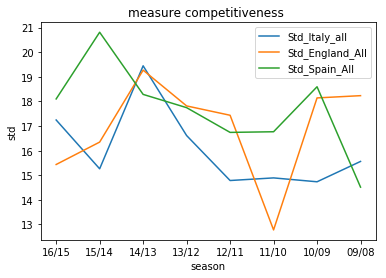

In [30]:
#plotting the standard deviation for total points in each country
fig, ax = plt.subplots()
seasons=[0,'16/15','15/14','14/13','13/12','12/11','11/10','10/09','09/08']
ax.set_xticklabels(seasons)
plt.plot(Std_Italy_all)
plt.plot(Std_England_All)
plt.plot(Std_Spain_All)
plt.legend(['Std_Italy_all','Std_England_All','Std_Spain_All'])
plt.xlabel('season')
plt.ylabel('std')
plt.title('measure competitiveness ')

In [31]:
#calculating mean of std in each country
Mean_Std_All=[np.average(Std_Italy_all),np.average(Std_England_All),np.average(Std_Spain_All)]
Mean_Std_All

[16.069262437027305, 16.934904436103555, 17.69759194500665]

#### As the mean for STD shows La Liga has more competitivness but that maybe not the whole story
#### So we need  to divide the teams in league to three groups [top6,midtable,last6]
#### The outlier for STD in Premier League in 2011/2010 season will be investigated 

In [32]:
#getting a list for standard deviation for total points each top 6 league
Std_Italy_Top6=[Italy_2015_2016.iloc[:6].total_points.std(),Italy_2014_2015.iloc[:6].total_points.std(),Italy_2013_2014.iloc[:6].total_points.std(),Italy_2012_2013.iloc[:6].total_points.std(),Italy_2011_2012.iloc[:6].total_points.std(),Italy_2010_2011.iloc[:6].total_points.std(),Italy_2009_2010.iloc[:6].total_points.std(),Italy_2008_2009.iloc[:6].total_points.std()]
Std_England_Top6=[England_2015_2016.iloc[:6].total_points.std(),England_2014_2015.iloc[:6].total_points.std(),England_2013_2014.iloc[:6].total_points.std(),England_2012_2013.iloc[:6].total_points.std(),England_2011_2012.iloc[:6].total_points.std(),England_2010_2011.iloc[:6].total_points.std(),England_2009_2010.iloc[:6].total_points.std(),England_2008_2009.iloc[:6].total_points.std()]
Std_Spain_Top6=[Spain_2015_2016.iloc[:6].total_points.std(),Spain_2014_2015.iloc[:6].total_points.std(),Spain_2013_2014.iloc[:6].total_points.std(),Spain_2012_2013.iloc[:6].total_points.std(),Spain_2011_2012.iloc[:6].total_points.std(),Spain_2010_2011.iloc[:6].total_points.std(),Spain_2009_2010.iloc[:6].total_points.std(),Spain_2008_2009.iloc[:6].total_points.std()]


Text(0.5,1,'measure competitiveness ')

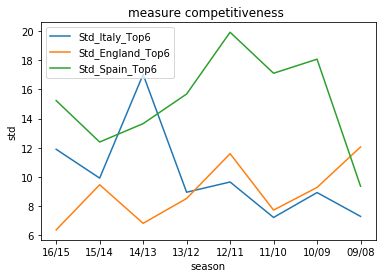

In [33]:
#plotting the standard deviation for total points top 6 in each country 
fig, ax = plt.subplots()
seasons=[0,'16/15','15/14','14/13','13/12','12/11','11/10','10/09','09/08']
ax.set_xticklabels(seasons)
plt.plot(Std_Italy_Top6)
plt.plot(Std_England_Top6)
plt.plot(Std_Spain_Top6)
plt.legend(['Std_Italy_Top6','Std_England_Top6','Std_Spain_Top6'])
plt.xlabel('season')
plt.ylabel('std')
plt.title('measure competitiveness ')

In [34]:
#calculating mean of std in each country top 6
Mean_Std_Top6=[np.average(Std_Italy_Top6),np.average(Std_England_Top6),np.average(Std_Spain_Top6)]
Mean_Std_Top6

[10.10172002828858, 8.966167039172074, 15.1819695067927]

#### Now We Can See That Premier League has A Lower STD Especially After 2008/2009 Season Which Means It has A Signficant Higher Competition Throw The Top 6 Teams And That Shows Why Premier League Is Called The Most Competitive League(Especially Compared to La Liga) As It's Expected That It's Much More Important To Have Competition In The Top Places In The Table Than In Midle Table Or The Back Of Table

In [35]:
#getting the standard deviation for total points midtable teams(7:14) in each country 
Std_Italy_7to14=[Italy_2015_2016.iloc[6:14].total_points.std(),Italy_2014_2015.iloc[6:14].total_points.std(),Italy_2013_2014.iloc[6:14].total_points.std(),Italy_2012_2013.iloc[6:14].total_points.std(),Italy_2011_2012.iloc[6:14].total_points.std(),Italy_2010_2011.iloc[6:14].total_points.std(),Italy_2009_2010.iloc[6:14].total_points.std(),Italy_2008_2009.iloc[6:14].total_points.std()]
Std_England_7to14=[England_2015_2016.iloc[6:14].total_points.std(),England_2014_2015.iloc[6:14].total_points.std(),England_2013_2014.iloc[6:14].total_points.std(),England_2012_2013.iloc[6:14].total_points.std(),England_2011_2012.iloc[6:14].total_points.std(),England_2010_2011.iloc[6:14].total_points.std(),England_2009_2010.iloc[6:14].total_points.std(),England_2008_2009.iloc[6:14].total_points.std()]
Std_Spain_7to14=[Spain_2015_2016.iloc[6:14].total_points.std(),Spain_2014_2015.iloc[6:14].total_points.std(),Spain_2013_2014.iloc[6:14].total_points.std(),Spain_2012_2013.iloc[6:14].total_points.std(),Spain_2011_2012.iloc[6:14].total_points.std(),Spain_2010_2011.iloc[6:14].total_points.std(),Spain_2009_2010.iloc[6:14].total_points.std(),Spain_2008_2009.iloc[6:14].total_points.std()]


Text(0.5,1,'measure competitiveness ')

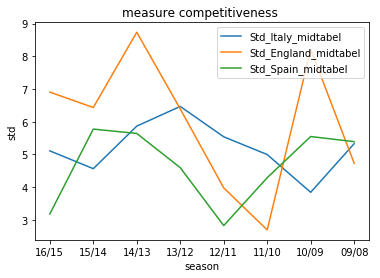

In [36]:
#plotting the standard deviation for total points midtable teams(7:14) in each country 
fig, ax = plt.subplots()
seasons=[0,'16/15','15/14','14/13','13/12','12/11','11/10','10/09','09/08']
ax.set_xticklabels(seasons)
plt.plot(Std_Italy_7to14)
plt.plot(Std_England_7to14)
plt.plot(Std_Spain_7to14)
plt.legend(['Std_Italy_midtabel','Std_England_midtabel','Std_Spain_midtabel'])
plt.xlabel('season')
plt.ylabel('std')
plt.title('measure competitiveness ')

In [37]:
#getting mean standard deviation 
Mean_Std_7to14=[np.average(Std_Italy_7to14),np.average(Std_England_7to14),np.average(Std_Spain_7to14)]
Mean_Std_7to14

[5.215832231380927, 6.011093321291993, 4.657223799353622]

#### Graph And Mean STD For Midtable Teams Shows That La Liga and Seria A Have Less STD Than Premier League But Graph Shows Two Interesting  For Premier League In 2010/2011 Which Is Very Low And 2013/2014 and 2012/2013 Which Is Relatively High

In [38]:
#investigating 2010/2011 and 2013/2014  seasons in Premier League


In [39]:
England_2010_2011.total_points.iloc[6:14],England_2010_2011.total_points.iloc[6:14].std()

(6     54
 7     49
 8     48
 9     47
 10    47
 11    46
 12    46
 13    46
 Name: total_points, dtype: int64, 2.6958963523950885)

#### In 2010/2011 The Results Shows A Very Unique Low STD And A Very High Competition in Midtable Teams

In [40]:
England_2013_2014.iloc[6:14]

,team_id,home_wins,home_draws,home_loses,away_wins,away_draws,away_loses,total_wins,total_loses,total_draws,total_points
6,Manchester United,9,3,7,10,4,5,19,12,7,64
7,Southampton,8,6,5,7,5,7,15,12,11,56
8,Stoke City,10,6,3,3,5,11,13,14,11,50
9,Newcastle United,8,3,8,7,1,11,15,19,4,49
10,Crystal Palace,8,3,8,5,3,11,13,19,6,45
11,Swansea City,6,5,8,5,4,10,11,18,9,42
12,West Ham United,7,3,9,4,4,11,11,20,7,40
13,Sunderland,5,3,11,5,5,9,10,20,8,38


In [41]:
England_2012_2013.iloc[6:14]

,team_id,home_wins,home_draws,home_loses,away_wins,away_draws,away_loses,total_wins,total_loses,total_draws,total_points
6,Liverpool,9,6,4,7,7,5,16,9,13,61
7,West Bromwich Albion,9,4,6,5,3,11,14,17,7,49
8,West Ham United,9,6,4,3,4,12,12,16,10,46
9,Swansea City,6,8,5,5,5,9,11,14,13,46
10,Norwich City,8,7,4,2,7,10,10,14,14,44
11,Fulham,7,3,9,4,7,8,11,17,10,43
12,Stoke City,7,7,5,2,8,9,9,14,15,42
13,Newcastle United,9,1,9,2,7,10,11,19,8,41


#### The Previous Results Shows Why There Was A Significant Raise In STD AS In Both Season The First Teams In Midtable Were Liverpool And Manchester United Two Of The Biggest Teams In England And Both Were Had A Relatively Higher Total Points Than Other Teams In Mid Table And If We Assumed Premier League Have Top 7 teams Not Only Top 6 Then STD Will Be Relativley Low In Midtable Teams [8:14]

In [42]:
# getting the standard deviation for total points top 7 in each country
Std_Italy_Top7=[Italy_2015_2016.iloc[:7].total_points.std(),Italy_2014_2015.iloc[:7].total_points.std(),Italy_2013_2014.iloc[:7].total_points.std(),Italy_2012_2013.iloc[:7].total_points.std(),Italy_2011_2012.iloc[:7].total_points.std(),Italy_2010_2011.iloc[:7].total_points.std(),Italy_2009_2010.iloc[:7].total_points.std(),Italy_2008_2009.iloc[:7].total_points.std()]
Std_England_Top7=[England_2015_2016.iloc[:7].total_points.std(),England_2014_2015.iloc[:7].total_points.std(),England_2013_2014.iloc[:7].total_points.std(),England_2012_2013.iloc[:7].total_points.std(),England_2011_2012.iloc[:7].total_points.std(),England_2010_2011.iloc[:7].total_points.std(),England_2009_2010.iloc[:7].total_points.std(),England_2008_2009.iloc[:7].total_points.std()]
Std_Spain_Top7=[Spain_2015_2016.iloc[:7].total_points.std(),Spain_2014_2015.iloc[:7].total_points.std(),Spain_2013_2014.iloc[:7].total_points.std(),Spain_2012_2013.iloc[:7].total_points.std(),Spain_2011_2012.iloc[:7].total_points.std(),Spain_2010_2011.iloc[:7].total_points.std(),Spain_2009_2010.iloc[:7].total_points.std(),Spain_2008_2009.iloc[:7].total_points.std()]


Text(0.5,1,'measure competitiveness ')

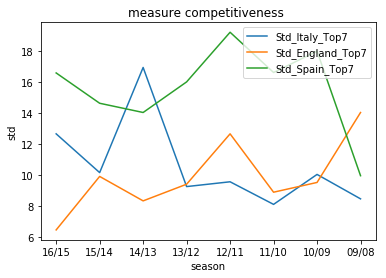

In [43]:
# plotting the standard deviation for total points top 7 in each country
fig, ax = plt.subplots()
seasons=[0,'16/15','15/14','14/13','13/12','12/11','11/10','10/09','09/08']
ax.set_xticklabels(seasons)
plt.plot(Std_Italy_Top7)
plt.plot(Std_England_Top7)
plt.plot(Std_Spain_Top7)
plt.legend(['Std_Italy_Top7','Std_England_Top7','Std_Spain_Top7'])
plt.xlabel('season')
plt.ylabel('std')
plt.title('measure competitiveness ')

In [44]:
Mean_Std_Top7=[np.average(Std_Italy_Top7),np.average(Std_England_Top7),np.average(Std_Spain_Top7)]
Mean_Std_Top7

[10.637212021970885, 9.891704303176699, 15.61560584716667]

In [45]:
Mean_Std_Top6

[10.10172002828858, 8.966167039172074, 15.1819695067927]

#### For A Top7 Analysis STD is Slightely Higher than Top 6 but Premier League Still The Lowest Which Means The Premier League Maintaines A Higher Upper Table Teams Competition For Up To 7 Teams(Especially The First Top 6)

In [46]:
# getting the standard deviation for total points last 6 in each country  
Std_Italy_Last6=[Italy_2015_2016.iloc[14:].total_points.std(),Italy_2014_2015.iloc[14:].total_points.std(),Italy_2013_2014.iloc[14:].total_points.std(),Italy_2012_2013.iloc[14:].total_points.std(),Italy_2011_2012.iloc[14:].total_points.std(),Italy_2010_2011.iloc[14:].total_points.std(),Italy_2009_2010.iloc[14:].total_points.std(),Italy_2008_2009.iloc[14:].total_points.std()]
Std_England_Last6=[England_2015_2016.iloc[14:].total_points.std(),England_2014_2015.iloc[14:].total_points.std(),England_2013_2014.iloc[14:].total_points.std(),England_2012_2013.iloc[14:].total_points.std(),England_2011_2012.iloc[14:].total_points.std(),England_2010_2011.iloc[14:].total_points.std(),England_2009_2010.iloc[14:].total_points.std(),England_2008_2009.iloc[14:].total_points.std()]
Std_Spain_Last6=[Spain_2015_2016.iloc[14:].total_points.std(),Spain_2014_2015.iloc[14:].total_points.std(),Spain_2013_2014.iloc[14:].total_points.std(),Spain_2012_2013.iloc[14:].total_points.std(),Spain_2011_2012.iloc[14:].total_points.std(),Spain_2010_2011.iloc[14:].total_points.std(),Spain_2009_2010.iloc[14:].total_points.std(),Spain_2008_2009.iloc[14:].total_points.std()]


Text(0.5,1,'measure competitiveness ')

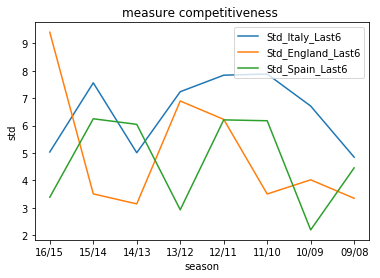

In [47]:
# plotting the standard deviation for total points last 6 in each country
fig, ax = plt.subplots()
seasons=[0,'16/15','15/14','14/13','13/12','12/11','11/10','10/09','09/08']
ax.set_xticklabels(seasons)
plt.plot(Std_Italy_Last6)
plt.plot(Std_England_Last6)
plt.plot(Std_Spain_Last6)
plt.legend(['Std_Italy_Last6','Std_England_Last6','Std_Spain_Last6'])
plt.xlabel('season')
plt.ylabel('std')
plt.title('measure competitiveness ')

In [48]:
Mean_Std_Last6=[np.average(Std_Italy_Last6),np.average(Std_England_Last6),np.average(Std_Spain_Last6)]
Mean_Std_Last6

[6.5173108384034, 5.007160833708673, 4.705840396160976]

#### For The Last 6 Teams Seria A has The Lowest STD And Premier League Has Lower STD Than La Liga
#### And There Is Outlier In STD For Last 6 Teams In Premier League In Season 2015/2016

In [49]:
#investigating the out lier in premier league 2015/2016
England_2015_2016.iloc[14:]

,team_id,home_wins,home_draws,home_loses,away_wins,away_draws,away_loses,total_wins,total_loses,total_draws,total_points
14,Crystal Palace,6,3,10,5,6,8,11,18,9,42
15,Bournemouth,5,5,9,6,4,9,11,18,9,42
16,Sunderland,6,6,7,3,6,10,9,17,12,39
17,Newcastle United,7,7,5,2,3,14,9,19,10,37
18,Norwich City,6,5,8,3,2,14,9,22,7,34
19,Aston Villa,2,5,12,1,3,15,3,27,8,17


#### Table Shows Why There Is Outlier In Last 6 Teams In Premier League As Team 'Aston Ville' Had A Very Low Total Points Compared To The Last 6 Teams

### Research Question 2  (What Is The Time Graph For Goals In League? And Has It A Unique Pattern?)

In [50]:
# getting match stats like goals, and assist and timing of goal
def get_events_stats(event_type, match):
    if pd.isna(match[event_type]):
        #make sure match has event(goal,card,shoton,...)
     
        return 0
    else:#extracting data from event column
        try:
            events_list = xmltodict.parse(match[event_type])[event_type]['value']
        except:
            return 0
    #counter for both teams and their events
    home_team_stats = {'team_id':match['home_team_api_id'], f'total_team_{event_type}':0}
    away_team_stats = {'team_id':match['away_team_api_id'], f'total_team_{event_type}':0}
    player_goals = {}  # { player_id: num }
    player_assist = {}  # { player_id: num }
    goal_time_type={}  #{time_of_goal:type_of_goal}
    

    # Run through the list of events (goals, moments near football goals, yellow/red cards)    
    if type(events_list) == list:
        for event in events_list:
            # Get necessary id from event info ('event' variable is a dict)
            try:
                player1_id = int(event['player1'])
            except:
                player1_id = 0
            if event_type == 'goal':
                player2_id = int(event.get('player2', 0))
                goal_type=event.get('goal_type')
                time=int(event.get('elapsed',0))
            try:
                team = int(event['team'])
            except:
                team = 0
            
            # Add one to counter of team results
            if team == home_team_stats['team_id']:
                home_team_stats[f'total_team_{event_type}'] += 1
            elif team == away_team_stats['team_id']:
                away_team_stats[f'total_team_{event_type}'] += 1
            
            # If we iterate through the goals --> count stats for every player
            if event_type == 'goal':
                player_assist[player2_id] = player_assist.get(player2_id, 0) + 1
                player_goals[player1_id] = player_goals.get(player1_id, 0) + 1
                goal_time_type[time]=goal_type
    # If current event type has only one event        
    elif type(events_list) == dict:
        # All the same as in a loop above
        try:
            player1_id = int(events_list['player1'])
        except:
            player1_id = 0
        if event_type == 'goal':
            player2_id = int(events_list.get('player2', 0))
            time=int(events_list.get('elapsed',0))
            goal_type=events_list.get('goal_type')
        try:
            team = int(events_list['team'])
        except:
            team = 0
        
        if team == home_team_stats['team_id']:
            home_team_stats[f'total_team_{event_type}'] += 1
        elif team == away_team_stats['team_id']:
            away_team_stats[f'total_team_{event_type}'] += 1
        
        if event_type == 'goal':
            player_assist[player2_id] = player_assist.get(player2_id, 0) + 1
            player_goals[player1_id] = player_goals.get(player1_id, 0) + 1
            goal_time_type[time]=goal_type
        
    # Results:
    if event_type == 'goal':
        return player_goals, player_assist,goal_time_type
    else:
        return home_team_stats, away_team_stats, player_goals

In [51]:
def sum_dicts(dict_1, dict_2) -> dict:  # Function for merging two dicts and sum values of intersected keys
    return {
        key: dict_1.get(key, 0) + dict_2.get(key, 0) for key in set(dict_1) | set(dict_2)
    }


In [52]:
def goal_time_league_graph(league):#getting graph for goal timing in league
    time_type=[]
    for index , tm in league.iterrows():#iterate throw league rows
           goals_time=get_events_stats('goal',tm)
           if goals_time:
               g_italy,a_italy,time=goals_time
               time_type.append(time)  
    df_time1=pd.DataFrame(time_type)
    df_time=df_time1.T.sort_index()#creating data frame for goal timing 
    #reverse index with head column and order index ascending
    
    plt.xlabel('time(minute)')
    plt.ylabel('number of goals')
    plt.title('Time_distribution')
    
    
    return plt.plot(df_time.T.count())
        #plot count of goals throw each minute
    
      

([<matplotlib.lines.Line2D at 0x7f5c3aa07b70>],
 [<matplotlib.lines.Line2D at 0x7f5c3ba30940>])

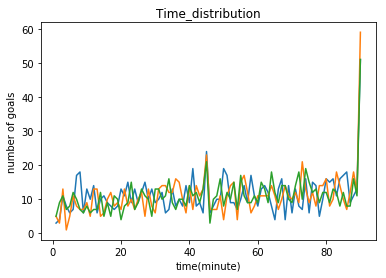

In [53]:
#graph for seasons 2015/2016 , 2014/2015 , 2013/2014 for la liga
goal_time_league_graph(Laliga_2015_2016,),goal_time_league_graph(Laliga_2014_2015,),goal_time_league_graph(Laliga_2013_2014,)

#### For Seansons 2015/2016 , 2014/2015 , 2013/2014 In La Liga We Can Notice That A Higher Number Of Goals Scored In +85 Minute And A Slightley High Goal Scoring In The End Of First Half(45 Min)

([<matplotlib.lines.Line2D at 0x7f5c3cc87dd8>],
 [<matplotlib.lines.Line2D at 0x7f5c3aa65908>])

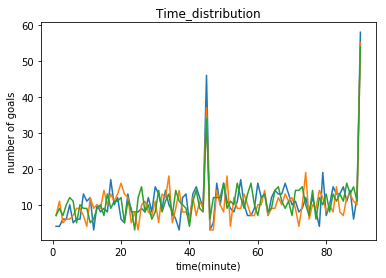

In [54]:
#graph for seasons 2015/2016 , 2014/2015 , 2013/2014 for premier league
goal_time_league_graph(Premier_League_2015_2016),goal_time_league_graph(Premier_League_2014_2015),goal_time_league_graph(Premier_League_2013_2014)

#### For Seansons 2015/2016 , 2014/2015 , 2013/2014 InPremier League We Can Notice That A Higher Number Of Goals Scored In +85 Minute(As La Liga) And A Relativley High Goal Scoring In The End Of First Half(45 Min)

([<matplotlib.lines.Line2D at 0x7f5c3ca3ac50>],
 [<matplotlib.lines.Line2D at 0x7f5c3aa2e080>])

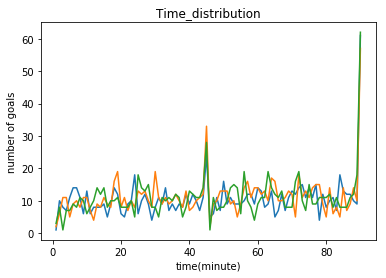

In [55]:
#graph for seasons 2015/2016 , 2014/2015 , 2013/2014 for seria a
goal_time_league_graph(Seria_A_2015_2016),goal_time_league_graph(Seria_A_2014_2015),goal_time_league_graph(Seria_A_2013_2014)

#### #### For Seansons 2015/2016 , 2014/2015 , 2013/2014 In Seria A We Can Notice That A Higher Number Of Goals Scored In +85 Minute(As La Liga) And A Relativley High(Higher Than La Liga But Lower ThanPremier League) Goal Scoring In The End Of First Half(45 Min)

#### Therefor  All Premier League , La Liga and Seria A Teams In The Three Seasons Have A High Goal Scoring In The Last Minutes of The Match And A High Goal Scoring In The Last Minute Of First Half(Much Higher For Premier League , High For Seria A  And Slightley High For La Liga But LA Liga Has A Slightley Higher Goal Scoring Throw The Rest Of Minutes

### Research Question 3  (What Is The Time Graph For Goals For A Specific Team ? And Has It A Unique Pattern?And Would It Differ If Match Was Home Or Away)

In [56]:

#getting goal_time and goal_type for one team
def goal_time_team_stats( match ,team_id):
    if pd.isna(match['goal']):#ensure match has goal data
        return 0
    else:#getting data from column 
        try:
            events_list = xmltodict.parse(match['goal'])['goal']['value']
        except:
            return 0
      
    goal_time_type={}#{goal time :goal type}
    
    if type(events_list) == list:
        for event in events_list: #itterate throw goal
            try:
                team = int(event['team'])
            except:
                 0
            if team==team_id :
               goal_type=event.get('goal_type')
               time=int(event.get('elapsed',0))#time for goal
               goal_time_type[time]=goal_type
               
    elif type(events_list) == dict:#same as previous loop but for single value  
        try:
            team = int(events_list['team'])
        except:
             0
        if team==team_id :
               goal_type=events_list.get('goal_type')
               time=int(events_list.get('elapsed',0))
               goal_time_type[time]=goal_type
        
    return goal_time_type
    

In [57]:
def goal_time_team_graph(league,team_id,team_pos):#get goal_time histogram 

    team_type_time=[]
    if team_pos=='home and away': #for both home and away matches for team
        for index , tm in league.query(f'home_team_api_id=={team_id} or  away_team_api_id=={team_id}').iterrows():
            team_type_time.append(goal_time_team_stats(tm,team_id))
    elif team_pos=='home': #for only home matches for team
        for index , tm in league.query(f'home_team_api_id=={team_id}').iterrows():
            team_type_time.append(goal_time_team_stats(tm,team_id))
    elif team_pos=='away': #for only away matches for team
        for index , tm in league.query(f'away_team_api_id=={team_id}').iterrows():
            team_type_time.append(goal_time_team_stats(tm,team_id))                
    team_time=[]
    for i in team_type_time:#getting goal_time from the dict
         if i!=0:
           for s in i.items():
               team_time.append(s)    
    team=pd.DataFrame(team_time,columns=['time_of_goal','goal_type'])   

    plt.xlabel('time of goal')
    plt.ylabel('number of goals')
    #Adding 5 Min Interval
    bins=np.arange(team['time_of_goal'].min()//1,team['time_of_goal'].max()+5,5)

    return plt.hist(team.time_of_goal,alpha=0.7,edgecolor='black',bins=bins)     #plotting histogram for team goal  

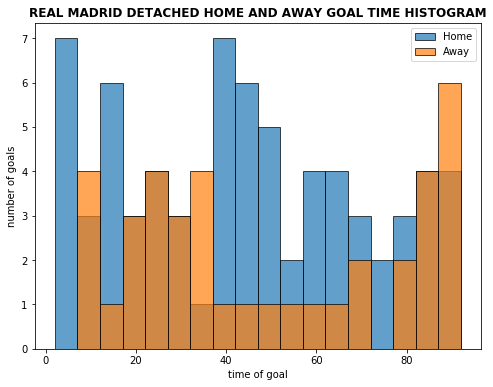

In [58]:
# REAL MADRID in 2015/2016 Season
#REAL MADRID DETACHED HOME AND AWAY GOAL TIME HISTOGRAM
fig, ax = plt.subplots(figsize =(8,6))

goal_time_team_graph(Laliga_2015_2016,8633,'home'),goal_time_team_graph(Laliga_2015_2016,8633,'away')
plt.title("REAL MADRID DETACHED HOME AND AWAY GOAL TIME HISTOGRAM",weight='bold')
plt.legend(['Home','Away'])


Text(0.5,1,'REAL MADRID COMBINED HOME AND AWAY GOAL TIME HISTOGRAM')

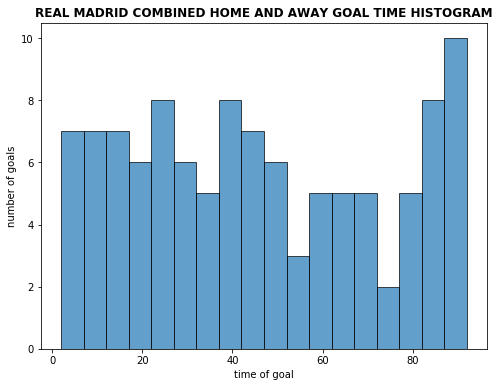

In [59]:
#REAL MADRID COMBINED HOME AND AWAY GOAL TIME HISTOGRAM
fig, ax = plt.subplots(figsize =(8,6))
goal_time_team_graph(Laliga_2015_2016,8633,'home and away')
plt.title('REAL MADRID COMBINED HOME AND AWAY GOAL TIME HISTOGRAM',weight='bold')

#### For Real Madrid HOME Matches Histogram Shows That In Home Matches Scores More Goals In (3:8) Min And The End And Beginning Of The Second Half(37:53)
#### In AWAY Matches Real Madrid Scores A Higher Goals In  The Last 10 Min Of Second Half Compared To The Rest Of Second Half Especially The Last 5 Min (Even Higher Than Home Matches)
#### For Overall Goal Time Histogram Real Madrid Has A High Goal Scoring In The Last 10 Minutes OF The Second Half  And For The First Half Till the (53)Min Show The Team Almost Have A Steady Scoring Value Throw The Bins(5Min Each) Of Almost 7Goals

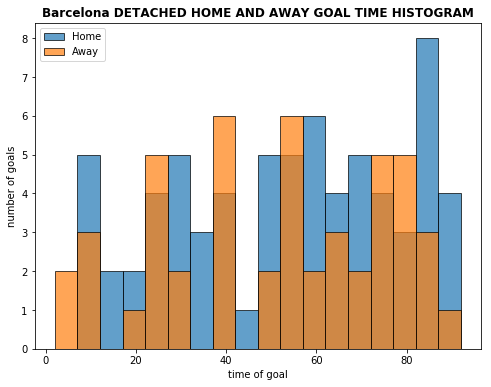

In [60]:
# Barcelona in 2015/2016 Season
#Barcelona DETACHED HOME AND AWAY GOAL TIME HISTOGRAM
fig, ax = plt.subplots(figsize =(8,6))

goal_time_team_graph(Laliga_2015_2016,8634,'home'),goal_time_team_graph(Laliga_2015_2016,8634,'away')
plt.title('Barcelona DETACHED HOME AND AWAY GOAL TIME HISTOGRAM',weight='bold')
plt.legend(['Home','Away'])

Text(0.5,1,'Barcelona COMBINED HOME AND AWAY GOAL TIME HISTOGRAM')

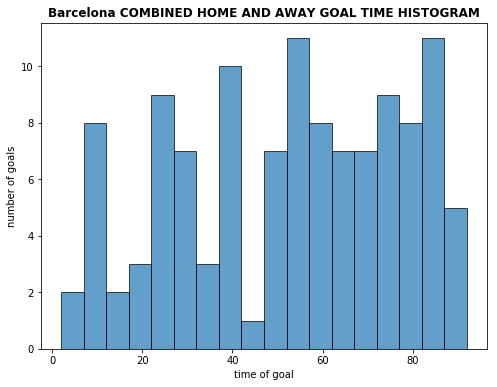

In [61]:
#Barcelona COMBINED HOME AND AWAY GOAL TIME HISTOGRAM
fig, ax = plt.subplots(figsize =(8,6))
goal_time_team_graph(Laliga_2015_2016,8634,'home and away')
plt.title('Barcelona COMBINED HOME AND AWAY GOAL TIME HISTOGRAM',weight='bold')


#### For Barcelona HOME Matches Histogram Shows That The Team Scoring Goals Majority Come In The Second Half Compared To The First Half And A Unique High Scoring Goals In (83:87) Min
#### In AWAY Matches BarcelonaScores A Higher Goals In The Second Half Compared To The First One And High Scoring And A Relative High Scoring In (37:43) 
#### Over All Barca Had Scored Most Of Their Goals In The Second Half(Unlike real Madrid) And A Unique Occuarrence Of Goals In[(37:43) Min , (23:30) Min , (7:13) Min] In The First Half

Text(0.5,1,'Liverpool DETACHED HOME AND AWAY GOAL TIME HISTOGRAM')

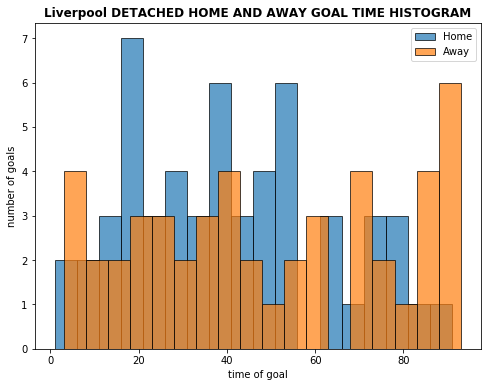

In [62]:
# Liverpool in 2013/2014 Season
#Liverpool DETACHED HOME AND AWAY GOAL TIME HISTOGRAM
fig, ax = plt.subplots(figsize =(8,6))

goal_time_team_graph(Premier_League_2013_2014,8650,'home'),goal_time_team_graph(Premier_League_2013_2014,8650,'away')
plt.legend(['Home','Away'])
plt.title('Liverpool DETACHED HOME AND AWAY GOAL TIME HISTOGRAM',weight='bold')

Text(0.5,1,'Liverpool COMBINED HOME AND AWAY GOAL TIME HISTOGRAM')

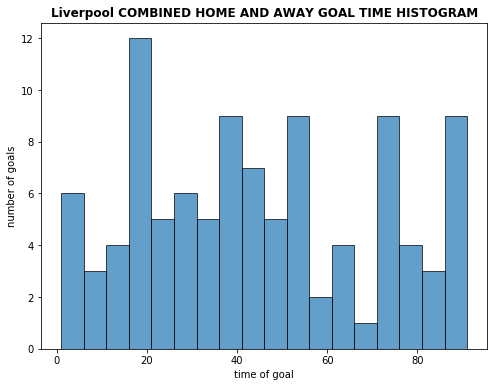

In [63]:
#Liverpool COMBINED HOME AND AWAY GOAL TIME HISTOGRAM
fig, ax = plt.subplots(figsize =(8,6))
goal_time_team_graph(Premier_League_2013_2014,8650,'home and away')
plt.title('Liverpool COMBINED HOME AND AWAY GOAL TIME HISTOGRAM',weight='bold')


#### For Liverpool HOME Matches Histogram Shows That For The Time Between 12 Min And 57 Min Has A Steady Goal Scoring Of Above 3 Goals Throw The Bins(5 Min) With Q Unique Occurrence Of Goal Scoring (16:21 Min),(36:42 Min) &(50:56 Min) 
#### In AWAY Matches LiverpoolScores A Significant Higher Goals In The Last 7 Mins (Much Higher Than Home Matches)
#### For Overall Goal Time Histogram Liverpool Has A Goal Distrbiution In(16 :56 Min) With A Unique Occurrence For Goal Scoring In The Last 10 Min Of First Half (36:45) , (51:56) Min And Especially In (16:21) Min

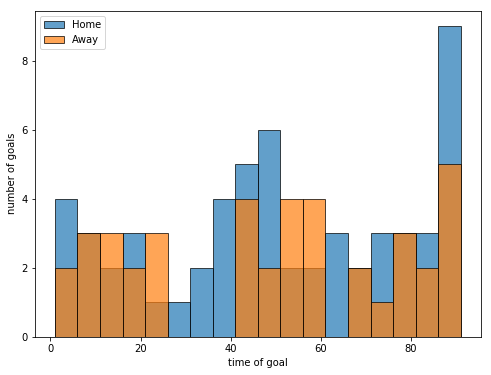

In [64]:
# ManCity in 2013/2014 Season
#ManCity DETACHED HOME AND AWAY GOAL TIME HISTOGRAM
fig, ax = plt.subplots(figsize =(8,6))

goal_time_team_graph(Premier_League_2013_2014,8456,'home'),goal_time_team_graph(Premier_League_2013_2014,8456,'away')
plt.legend(['Home','Away'])


Text(0.5,1,'ManCity COMBINED HOME AND AWAY GOAL TIME HISTOGRAM')

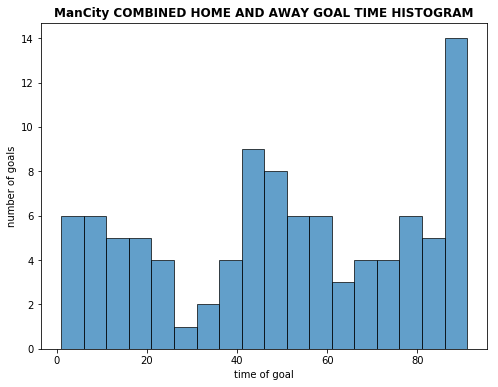

In [65]:
#ManCity COMBINED HOME AND AWAY GOAL TIME HISTOGRAM
fig, ax = plt.subplots(figsize =(8,6))
goal_time_team_graph(Premier_League_2013_2014,8456,'home and away')
plt.title('ManCity COMBINED HOME AND AWAY GOAL TIME HISTOGRAM',weight='bold')


#### For ManCity HOME Matches Histogram Shows That A High Acsending Goal Scoring From The Last 10 Min Of The First Half To The First 5 Min Of Second Half Then A Unique Goal Scoring Occurrence In The Last 5 Min Of The Match 
#### In AWAY Matches ManCity Goal Distibution Has A Unique Shape OF Three Thirds ,First (2:27)Min,Second(40:60) Min And Last (65:90) With A Relative High Goal Scoring InThe Last 5 Mins
#### For Overall Goal Time Histogram ManCity Has A High Goal Scoring In First 20 Minutes,End And Beginning Of First And Second Half(40:60) And A Unique Goal Scoring In The Last 5 Mins

<a id='conclusions'></a>
## Conclusions

### Premier League Has A Higher Competition Than La Liga Especially In The Top6 Places Of The League
##### Limitation For This Analysis IgNoring The Quality Of Football Of The League(Measured By The Quality Of The Team),Dataset Is For Older League Stats (The Most recent One From Seven Years),How Important Is The Match(for Example If It Was In The Last Weeks Of League And Will Not Affect Both Of Team Ranking To The End Of Season)
### All Premier League , La Liga and Seria A Teams In The Three Seasons Have A High Goal Scoring In The Last Minutes of The Match And A High Goal Scoring In The Last Minute Of First Half(Much Higher For Premier League , High For Seria A  And Slightley High For La Liga But LA Liga Has A Slightley Higher Goal Scoring Throw The Rest Of Minutes
##### Limitation For This Analysis Is That 'Gaol Occurence circumstances' Is Ignored(The Aggregate Before Each Goal If The Team Was Losing Or It Was A Tie Or It Was The First Goal , Was The Team Full Squad Or There Was A Red Card, How Important Was The Match For Both Teams ..etc..) ) 
### Every team Has A Pattern For Scoring Goals Minutes 
##### Limitation For This Analysis Is That 'Gaol Occurence circumstances' Is Ignored(The Aggregate Before Each Goal If The Team Was Losing Or It Was A Tie Or It Was The First Goal , Was The Team Full Squad Or There Was A Red Card, How Important Was The Match For Both Teams ..etc..) ) 


In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0